Shortest Distance: 1261.54 km, Path: ['DEL', 'HYD']
All Paths: [['DEL', 'BOM', 'BLR', 'HYD'], ['DEL', 'BOM', 'BLR', 'MAA', 'HYD'], ['DEL', 'BOM', 'HYD'], ['DEL', 'BOM', 'MAA', 'BLR', 'HYD'], ['DEL', 'BOM', 'MAA', 'HYD'], ['DEL', 'BLR', 'BOM', 'HYD'], ['DEL', 'BLR', 'BOM', 'MAA', 'HYD'], ['DEL', 'BLR', 'HYD'], ['DEL', 'BLR', 'MAA', 'BOM', 'HYD'], ['DEL', 'BLR', 'MAA', 'HYD'], ['DEL', 'HYD'], ['DEL', 'MAA', 'BOM', 'BLR', 'HYD'], ['DEL', 'MAA', 'BOM', 'HYD'], ['DEL', 'MAA', 'BLR', 'BOM', 'HYD'], ['DEL', 'MAA', 'BLR', 'HYD'], ['DEL', 'MAA', 'HYD']]
Minimum Stops: 1, Path: ['DEL', 'HYD']


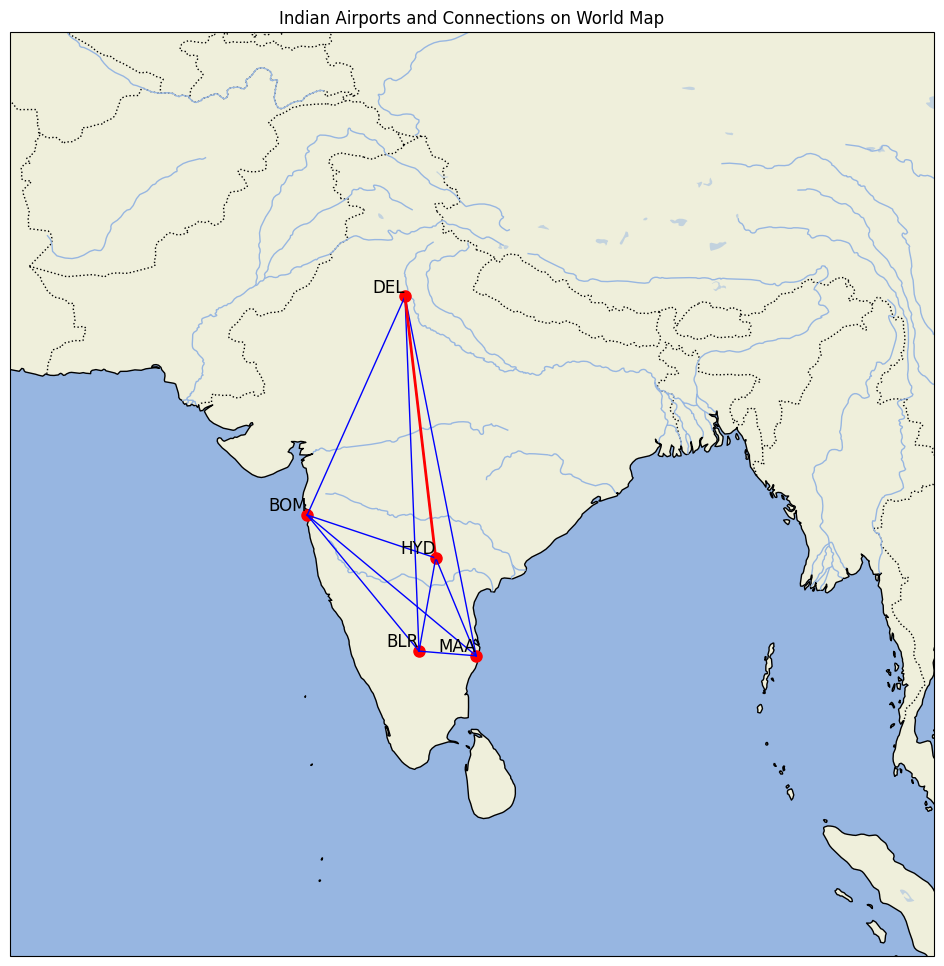

In [9]:
import pandas as pd
import networkx as nx
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Sample data (replace with actual Indian airport data)
data = {
    'Airport': ['DEL', 'BOM', 'BLR', 'HYD', 'MAA'],
    'Latitude': [28.5562, 19.0896, 13.1979, 17.2313, 12.9941],
    'Longitude': [77.1000, 72.8656, 77.7066, 78.4294, 80.1803]
}

df = pd.DataFrame(data)

# Create a graph
G = nx.Graph()

# Add nodes
for index, row in df.iterrows():
    G.add_node(row['Airport'], pos=(row['Longitude'], row['Latitude']))

# Add edges with distances
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        src = df.loc[i, 'Airport']
        dest = df.loc[j, 'Airport']
        distance = geodesic((df.loc[i, 'Latitude'], df.loc[i, 'Longitude']),
                            (df.loc[j, 'Latitude'], df.loc[j, 'Longitude'])).kilometers
        G.add_edge(src, dest, weight=distance)

# Define Functions for Path Calculations
def shortest_distance(G, source, destination):
    try:
        distance = nx.dijkstra_path_length(G, source, destination, weight='weight')
        path = nx.dijkstra_path(G, source, destination, weight='weight')
        return distance, path
    except nx.NetworkXNoPath:
        return float('inf'), []

def all_paths(G, source, destination):
    try:
        paths = list(nx.all_simple_paths(G, source, destination))
        return paths
    except nx.NetworkXNoPath:
        return []

def min_stops(G, source, destination):
    try:
        path = nx.shortest_path(G, source, destination)
        stops = len(path) - 1
        return stops, path
    except nx.NetworkXNoPath:
        return float('inf'), []

# Plot the Graph on a World Map using Cartopy
def plot_graph_on_map(G, pos, path=None):
    plt.figure(figsize=(15, 12))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    ax.set_extent([60, 100, 0, 40], crs=ccrs.PlateCarree())

    # Draw nodes
    for node, (lon, lat) in pos.items():
        ax.plot(lon, lat, marker='o', markersize=8, color='red', transform=ccrs.PlateCarree())
        plt.text(lon, lat, node, fontsize=12, ha='right', va='bottom', transform=ccrs.PlateCarree())

    # Draw edges
    for edge in G.edges():
        src, dest = edge
        lon1, lat1 = pos[src]
        lon2, lat2 = pos[dest]
        ax.plot([lon1, lon2], [lat1, lat2], 'b-', linewidth=1, transform=ccrs.PlateCarree())

    # Highlight path
    if path:
        for i in range(len(path) - 1):
            lon1, lat1 = pos[path[i]]
            lon2, lat2 = pos[path[i + 1]]
            ax.plot([lon1, lon2], [lat1, lat2], 'r-', linewidth=2, transform=ccrs.PlateCarree())

    plt.title("Indian Airports and Connections on World Map")
    plt.show()

# Get positions for the nodes
pos = {airport: (row['Longitude'], row['Latitude']) for airport, row in df.set_index('Airport').iterrows()}

# Example usage
source = 'DEL'
destination = 'HYD'

shortest_distance_value, shortest_path = shortest_distance(G, source, destination)
all_paths_list = all_paths(G, source, destination)
min_stops_value, min_stops_path = min_stops(G, source, destination)

print(f"Shortest Distance: {shortest_distance_value:.2f} km, Path: {shortest_path}")
print(f"All Paths: {all_paths_list}")
print(f"Minimum Stops: {min_stops_value}, Path: {min_stops_path}")

# Plot the graph with the shortest path on a world map
plot_graph_on_map(G, pos, shortest_path)


Shortest Flight Duration: 210.00 minutes, Path: ['DEL', 'BOM', 'HYD']


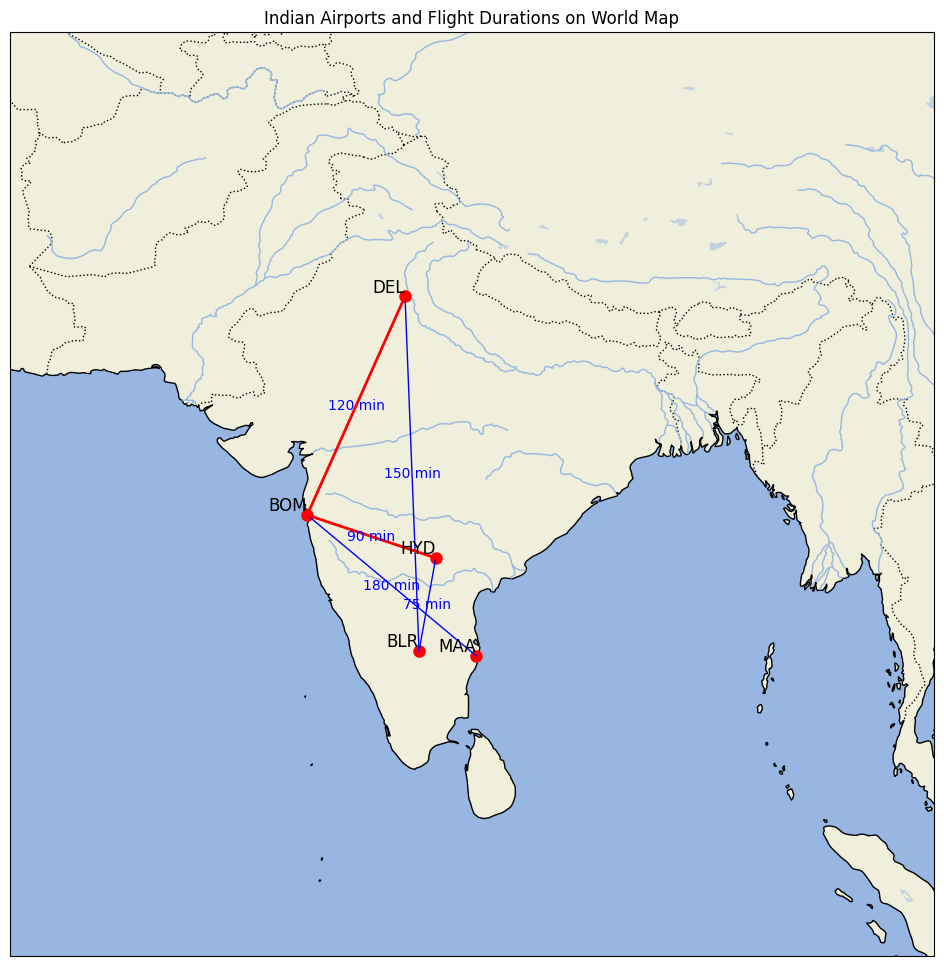

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Sample data (replace with actual Indian airport data and flight timings)
airport_data = {
    'Airport': ['DEL', 'BOM', 'BLR', 'HYD', 'MAA'],
    'Latitude': [28.5562, 19.0896, 13.1979, 17.2313, 12.9941],
    'Longitude': [77.1000, 72.8656, 77.7066, 78.4294, 80.1803]
}

flight_data = {
    'Source': ['DEL', 'DEL', 'BOM', 'BOM', 'BLR'],
    'Destination': ['BOM', 'BLR', 'HYD', 'MAA', 'HYD'],
    'Duration': [120, 150, 90, 180, 75]  # Duration in minutes
}

df_airports = pd.DataFrame(airport_data)
df_flights = pd.DataFrame(flight_data)

# Create a graph
G = nx.Graph()

# Add nodes
for index, row in df_airports.iterrows():
    G.add_node(row['Airport'], pos=(row['Longitude'], row['Latitude']))

# Add edges with flight durations
for index, row in df_flights.iterrows():
    G.add_edge(row['Source'], row['Destination'], weight=row['Duration'])

# Define Functions for Path Calculations
def shortest_flight(G, source, destination):
    try:
        duration = nx.dijkstra_path_length(G, source, destination, weight='weight')
        path = nx.dijkstra_path(G, source, destination, weight='weight')
        return duration, path
    except nx.NetworkXNoPath:
        return float('inf'), []

# Plot the Graph on a World Map using Cartopy
def plot_graph_on_map(G, pos, path=None):
    plt.figure(figsize=(15, 12))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    ax.set_extent([60, 100, 0, 40], crs=ccrs.PlateCarree())

    # Draw nodes
    for node, (lon, lat) in pos.items():
        ax.plot(lon, lat, marker='o', markersize=8, color='red', transform=ccrs.PlateCarree())
        plt.text(lon, lat, node, fontsize=12, ha='right', va='bottom', transform=ccrs.PlateCarree())

    # Draw edges
    for edge in G.edges(data=True):
        src, dest, data = edge
        lon1, lat1 = pos[src]
        lon2, lat2 = pos[dest]
        ax.plot([lon1, lon2], [lat1, lat2], 'b-', linewidth=1, transform=ccrs.PlateCarree())
        plt.text((lon1 + lon2) / 2, (lat1 + lat2) / 2, f"{data['weight']} min", color='blue',
                 fontsize=10, ha='center', va='center', transform=ccrs.PlateCarree())

    # Highlight path
    if path:
        for i in range(len(path) - 1):
            lon1, lat1 = pos[path[i]]
            lon2, lat2 = pos[path[i + 1]]
            ax.plot([lon1, lon2], [lat1, lat2], 'r-', linewidth=2, transform=ccrs.PlateCarree())

    plt.title("Indian Airports and Flight Durations on World Map")
    plt.show()

# Get positions for the nodes
pos = {airport: (row['Longitude'], row['Latitude']) for airport, row in df_airports.set_index('Airport').iterrows()}

# Example usage
source = 'DEL'
destination = 'HYD'

shortest_flight_duration, shortest_flight_path = shortest_flight(G, source, destination)

print(f"Shortest Flight Duration: {shortest_flight_duration:.2f} minutes, Path: {shortest_flight_path}")

# Plot the graph with the shortest flight path on a world map
plot_graph_on_map(G, pos, shortest_flight_path)


Next Shortest Flight Between DEL to BOM on 2024-07-16 07:00:00: Airline: AirAsia, Departure: 2024-07-16 08:00:00, Arrival: 2024-07-16 10:00:00, Duration: 120.0 minutes,Path: ['DEL', 'BOM', 'HYD']


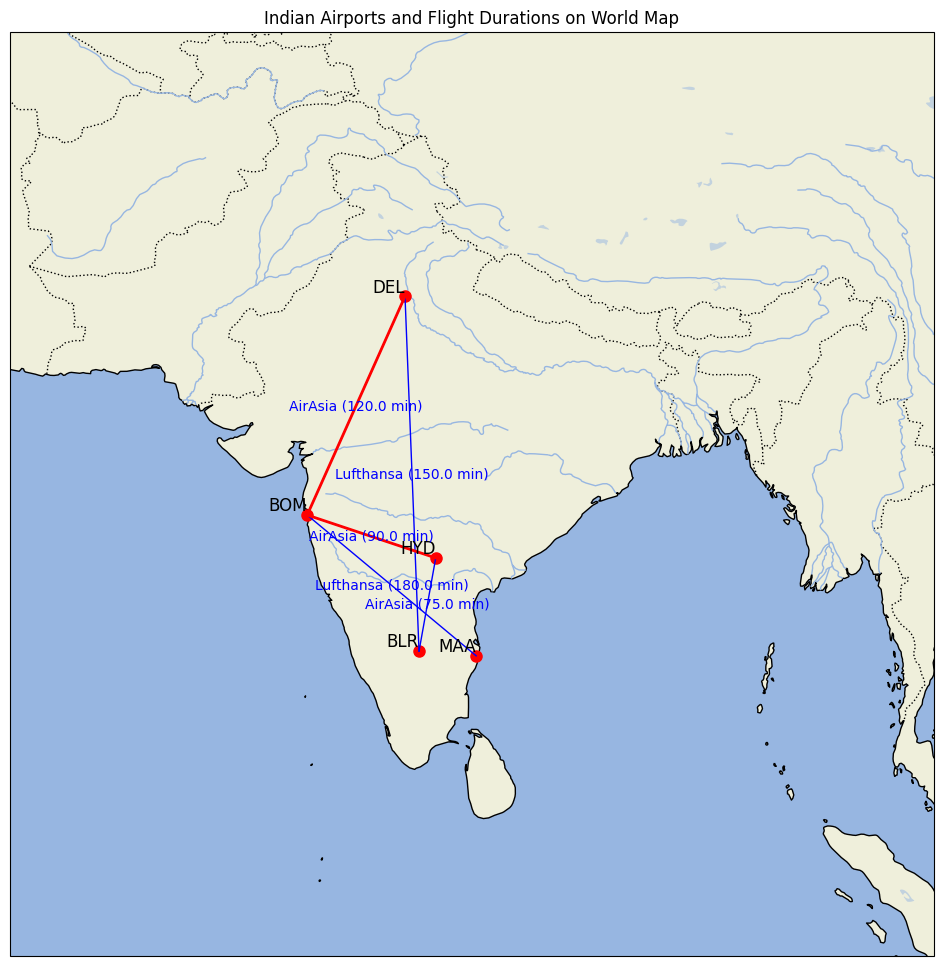

In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime, timedelta

# Sample data (replace with actual data)
airport_data = {
    'Airport': ['DEL', 'BOM', 'BLR', 'HYD', 'MAA'],
    'Latitude': [28.5562, 19.0896, 13.1979, 17.2313, 12.9941],
    'Longitude': [77.1000, 72.8656, 77.7066, 78.4294, 80.1803]
}

flight_data = {
    'Source': ['DEL', 'DEL', 'BOM', 'BOM', 'BLR'],
    'Destination': ['BOM', 'BLR', 'HYD', 'MAA', 'HYD'],
    'Airline': ['AirAsia', 'Lufthansa', 'AirAsia', 'Lufthansa', 'AirAsia'],
    'DepartureTime': ['2024-07-16 08:00', '2024-07-16 09:00', '2024-07-16 06:00', '2024-07-16 14:00', '2024-07-16 12:00'],
    'ArrivalTime': ['2024-07-16 10:00', '2024-07-16 11:30', '2024-07-16 07:30', '2024-07-16 17:00', '2024-07-16 13:15']
}

df_airports = pd.DataFrame(airport_data)
df_flights = pd.DataFrame(flight_data)

# Convert times to datetime
df_flights['DepartureTime'] = pd.to_datetime(df_flights['DepartureTime'])
df_flights['ArrivalTime'] = pd.to_datetime(df_flights['ArrivalTime'])

# Calculate flight durations in minutes
df_flights['Duration'] = (df_flights['ArrivalTime'] - df_flights['DepartureTime']).dt.total_seconds() / 60

# Create a graph
G = nx.DiGraph()

# Add nodes
for index, row in df_airports.iterrows():
    G.add_node(row['Airport'], pos=(row['Longitude'], row['Latitude']))

# Add edges with flight details
for index, row in df_flights.iterrows():
    G.add_edge(row['Source'], row['Destination'], 
               weight=row['Duration'], 
               airline=row['Airline'], 
               departure=row['DepartureTime'], 
               arrival=row['ArrivalTime'])

# Function to find the next shortest flight based on the time of day
def next_shortest_flight(G, source, destination, current_time):
    shortest_flight = None
    min_duration = float('inf')
    
    for edge in G.edges(data=True):
        if edge[0] == source and edge[1] == destination and edge[2]['departure'] >= current_time:
            if edge[2]['weight'] < min_duration:
                min_duration = edge[2]['weight']
                shortest_flight = edge

    if shortest_flight:
        return shortest_flight[2]['airline'], shortest_flight[2]['departure'], shortest_flight[2]['arrival'], min_duration
    else:
        return None, None, None, float('inf')

# Plot the Graph on a World Map using Cartopy
def plot_graph_on_map(G, pos, path=None):
    plt.figure(figsize=(15, 12))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    ax.set_extent([60, 100, 0, 40], crs=ccrs.PlateCarree())

    # Draw nodes
    for node, (lon, lat) in pos.items():
        ax.plot(lon, lat, marker='o', markersize=8, color='red', transform=ccrs.PlateCarree())
        plt.text(lon, lat, node, fontsize=12, ha='right', va='bottom', transform=ccrs.PlateCarree())

    # Draw edges
    for edge in G.edges(data=True):
        src, dest, data = edge
        lon1, lat1 = pos[src]
        lon2, lat2 = pos[dest]
        ax.plot([lon1, lon2], [lat1, lat2], 'b-', linewidth=1, transform=ccrs.PlateCarree())
        plt.text((lon1 + lon2) / 2, (lat1 + lat2) / 2, f"{data['airline']} ({data['weight']} min)", color='blue',
                 fontsize=10, ha='center', va='center', transform=ccrs.PlateCarree())

    # Highlight path
    if path:
        for i in range(len(path) - 1):
            lon1, lat1 = pos[path[i]]
            lon2, lat2 = pos[path[i + 1]]
            ax.plot([lon1, lon2], [lat1, lat2], 'r-', linewidth=2, transform=ccrs.PlateCarree())

    plt.title("Indian Airports and Flight Durations on World Map")
    plt.show()

# Get positions for the nodes
pos = {airport: (row['Longitude'], row['Latitude']) for airport, row in df_airports.set_index('Airport').iterrows()}

# Example usage
source = 'DEL'
destination = 'BOM'
current_time = datetime.strptime('2024-07-16 07:00', '%Y-%m-%d %H:%M')

airline, departure, arrival, duration = next_shortest_flight(G, source, destination, current_time)

print(f"Next Shortest Flight Between {source} to {destination} on {current_time}: Airline: {airline}, Departure: {departure}, Arrival: {arrival}, Duration: {duration} minutes,Path: {shortest_flight_path}")

# Plot the graph with the shortest flight path on a world map
plot_graph_on_map(G, pos,shortest_flight_path)
